In [14]:
import networkx as nx 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import math
from scipy import optimize
import scipy
import sys
from src import SimGame as sg
from src import SingleAgent as sa
from src import helperfunctions as hf
import random

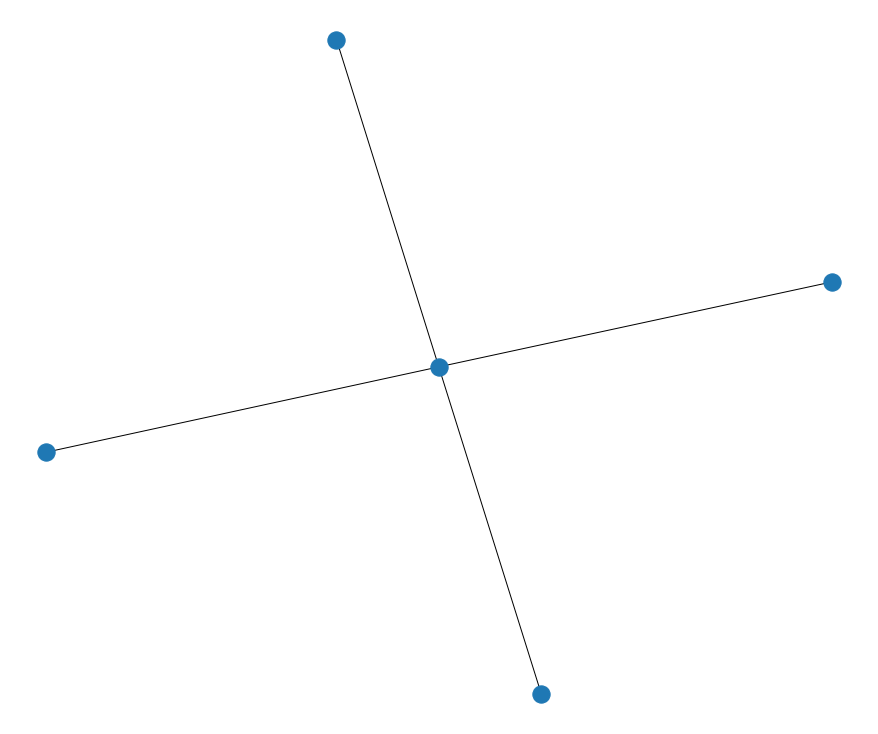

In [15]:
G = nx.star_graph(4)
h = np.zeros(len(G.nodes.keys()))

nx.draw(G)


def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / float(N)

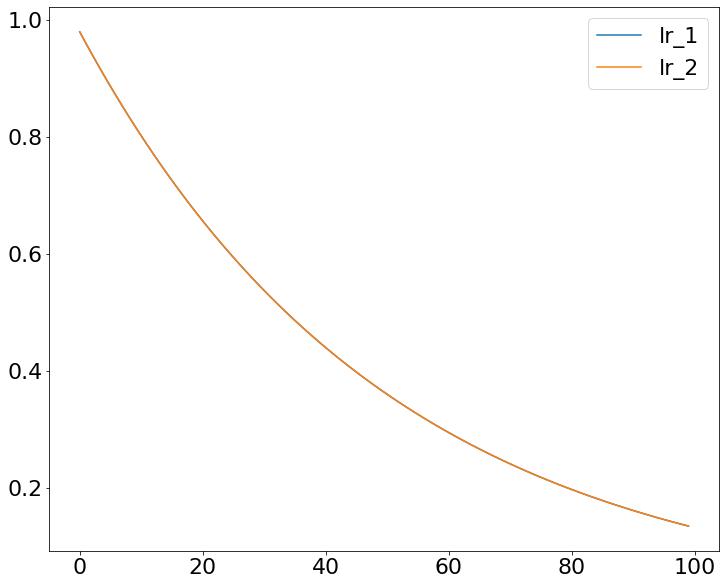

In [16]:
b = np.zeros(len(G.nodes.keys()))
budget_pos=5.0
budget_neg=3.0

lr_1 = lambda x,maxiter : np.exp(-x/(0.5*maxiter))
lr_2 = lambda x,maxiter : np.exp(-x/(0.5*maxiter))


x = np.linspace(1,100,100)
plt.plot(lr_1(x,100),label='lr_1')
plt.plot(lr_2(x,100),label='lr_2')
plt.legend()

In [17]:



params = {'optimiser_type':'adam','lr_1':lr_1,'lr_2':lr_2}
system = sg.mf_ising_system(G,b,iim_iter=50,fixed_point_iter=int(5*1e5),iim_tol_fac=1e-3,**params)



beta=1.0


control_pos,control_neg,mag=system.MF_IIM(budget_pos,budget_neg,beta)

print(control_pos)
print(control_neg)
print(sum(mag))



100%|█████████████████████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 205.56it/s]

Failed to converge after 50 iterations
[0.         2.32546846 0.63156541 0.69377918 1.34918696]
[0.         2.06651815 0.         0.04208734 0.89139451]
4.6007700430092715


In [18]:

X=np.array(system.gradient_history_neg)
print(X)

# n=10
# plt.plot(running_mean(X[:,0],n))
# plt.show()
# plt.plot(running_mean(X[:,1],n))
# plt.show()

# plt.plot(running_mean(X[:,2],n))
# plt.show()

# plt.plot(running_mean(X[:,3],n))
# plt.show()

# plt.plot(running_mean(X[:,4],n))


[[-0.0648898  -1.04702618 -0.03913441 -0.01954133 -0.29883035]
 [-0.05132426 -1.02566889 -0.03662233 -0.02597931 -0.28163699]
 [-0.02035313 -0.93474475 -0.05567318 -0.0473609  -0.21380538]
 [-0.01132101 -0.79579333 -0.08278617 -0.07902394 -0.1470614 ]
 [-0.00840673 -0.65276041 -0.11276864 -0.11572004 -0.1038491 ]
 [-0.00732028 -0.55707962 -0.13939807 -0.14848561 -0.08182157]
 [-0.00693176 -0.50437521 -0.15802502 -0.17048138 -0.07122101]
 [-0.00673121 -0.47540868 -0.16713686 -0.17985775 -0.06860237]
 [-0.00599214 -0.39818186 -0.16784047 -0.17866896 -0.08588044]
 [-0.00556359 -0.34823077 -0.16281943 -0.17085735 -0.10879468]
 [-0.00534702 -0.31901143 -0.15493219 -0.16022675 -0.13501636]
 [-0.00526251 -0.30243396 -0.14653438 -0.15104503 -0.16066947]
 [-0.00523795 -0.29129742 -0.14059505 -0.14493828 -0.18152514]
 [-0.00523736 -0.28497044 -0.13724227 -0.14149041 -0.19474273]
 [-0.00523978 -0.28268726 -0.13603616 -0.14024998 -0.19978215]
 [-0.00523978 -0.28268746 -0.13603626 -0.14025009 -0.19

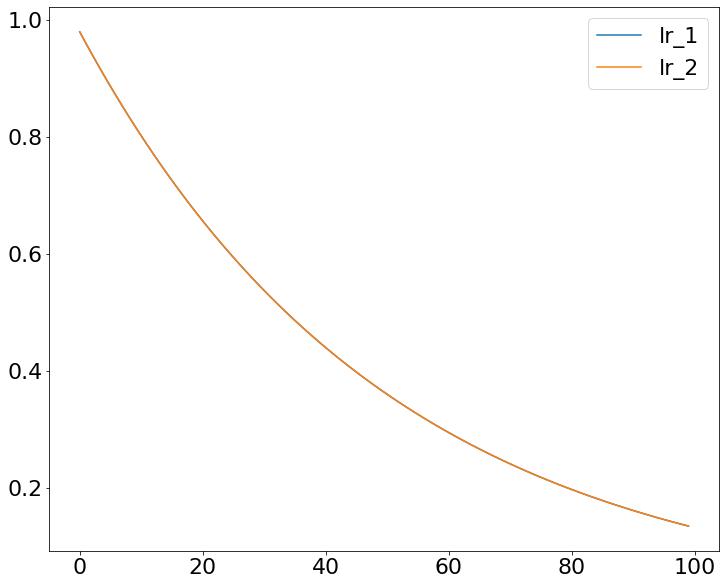

In [19]:
b = np.zeros(len(G.nodes.keys()))
budget_pos=5.0
budget_neg=3.0

lr_2 = lambda x,maxiter : np.exp(-x/(0.5*maxiter))
lr_1 = lambda x,maxiter : np.exp(-x/(0.5*maxiter))


x = np.linspace(1,100,100)
plt.plot(lr_1(x,100),label='lr_1')
plt.plot(lr_2(x,100),label='lr_2')
plt.legend()

In [20]:
def init_allocation(budget_pos,budget_neg):
    periph = lambda hub,budget: (budget-hub)/4.0

    hub_pos= random.uniform(0,budget_pos)
    hub_neg = random.uniform(0,budget_neg)
    per_pos = periph(hub_pos,budget_pos)
    per_neg = periph(hub_neg,budget_neg)

    init_pos = np.array([hub_pos,per_pos,per_pos,per_pos,per_pos])
    init_neg = np.array([hub_neg,per_neg,per_neg,per_neg,per_neg])
    init_alloc = np.column_stack((init_pos,init_neg)).T
    return init_alloc

init_allocation(budget_pos,budget_neg)


array([[3.35435787, 0.41141053, 0.41141053, 0.41141053, 0.41141053],
       [1.03731309, 0.49067173, 0.49067173, 0.49067173, 0.49067173]])

In [21]:
b = np.zeros(len(G.nodes.keys()))
budget_pos=2.0
budget_neg=2.0


params = {'optimiser_type':'adam','lr_1':lr_1,'lr_2':lr_2,'beta1':0.9,'beta2':0.999,'eps':0.1}
system = sg.mf_ising_system(G,b,iim_iter=100,fixed_point_iter=int(5*1e5),iim_tol_fac=1e-3,**params)

beta=1.0

iters=20

pos_degrees=[]
neg_degrees=[]

for i in range(iters):
    init_external=init_allocation(budget_pos,budget_neg)
    control_pos,control_neg,mag=system.MF_IIM(budget_pos,budget_neg,beta,init_alloc=init_external)
    print('gradient_pos',system.gradient_history_pos[-1])
    print('2nd gradient pos',system.grad2pos[-1])
    controls_pos = system.control_field_history_pos
    controls_neg = system.control_field_history_neg
    temp_pos=[]
    temp_neg=[]
    for idx in range(controls_pos.shape[0]):
        temp_pos.append(controls_pos[idx][0])
        temp_neg.append(controls_neg[idx][0])
    
    pos_degrees.append(temp_pos)
    neg_degrees.append(temp_neg)


 10%|████████                                                                         | 10/100 [00:00<00:00, 96.41it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 14%|███████████▏                                                                    | 14/100 [00:00<00:00, 135.91it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 25%|████████████████████                                                            | 25/100 [00:00<00:00, 221.10it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 10%|████████                                                                         | 10/100 [00:00<00:00, 97.35it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 23%|██████████████████▍                                                             | 23/100 [00:00<00:00, 203.74it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 21%|████████████████▊                                                               | 21/100 [00:00<00:00, 205.26it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 22%|█████████████████▌                                                              | 22/100 [00:00<00:00, 216.27it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 18%|██████████████▍                                                                 | 18/100 [00:00<00:00, 174.81it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 13%|██████████▍                                                                     | 13/100 [00:00<00:00, 126.90it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 13%|██████████▍                                                                     | 13/100 [00:00<00:00, 119.17it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 21%|████████████████▊                                                               | 21/100 [00:00<00:00, 181.91it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 25%|████████████████████                                                            | 25/100 [00:00<00:00, 231.30it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 23%|██████████████████▍                                                             | 23/100 [00:00<00:00, 163.60it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 15%|████████████                                                                    | 15/100 [00:00<00:00, 148.52it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 23%|██████████████████▍                                                             | 23/100 [00:00<00:00, 202.91it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


  6%|████▉                                                                             | 6/100 [00:00<00:01, 53.78it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 14%|███████████▏                                                                    | 14/100 [00:00<00:00, 139.02it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 28%|██████████████████████▍                                                         | 28/100 [00:00<00:00, 265.23it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


 10%|████████                                                                         | 10/100 [00:00<00:01, 82.19it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


100%|███████████████████████████████████████████████████████████████████████████████| 100/100 [00:00<00:00, 159.45it/s]

Failed to converge after 100 iterations
gradient_pos [0.02497493 0.43347162 0.43347162 0.43347162 0.43347162]
2nd gradient pos [-0.16084017 -0.71790827 -0.71790827 -0.71790827 -0.71790827]


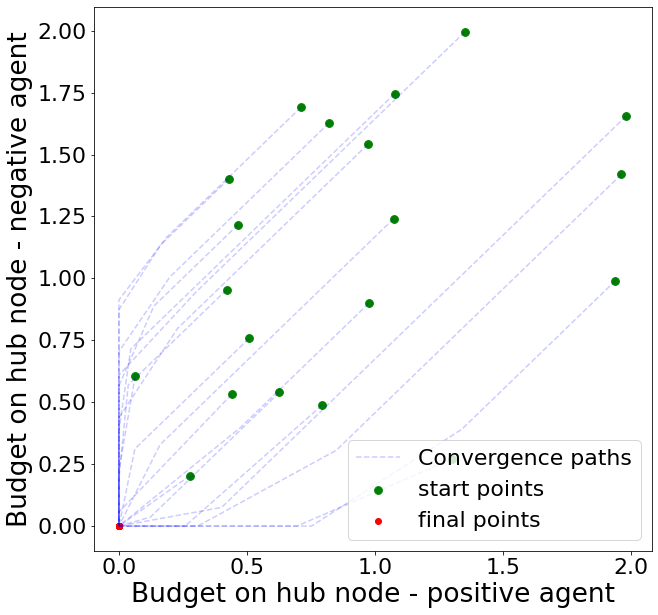

In [22]:
import matplotlib
matplotlib.rcParams.update({'font.size': 22,'figure.figsize':(12,10),'axes.labelsize': 'large',
                           'axes.titlesize':18})

fig,ax=plt.subplots(figsize=(10,10))

n=1

for idx,run in enumerate(pos_degrees):
    
    ax.plot(run[::n],neg_degrees[idx][::n],label='Convergence paths',c='blue',linestyle='dashed',alpha=0.2)
    ax.set_xlabel('Budget on hub node - positive agent')
    ax.set_ylabel('Budget on hub node - negative agent')
    ax.scatter(run[0],neg_degrees[idx][0],c='green',label='start points',s=60)
    ax.scatter(run[-1],neg_degrees[idx][-1],c='red',label='final points')

    hand, labl = ax.get_legend_handles_labels()
    handout=[]
    lablout=[]
    for h,l in zip(hand,labl):
        if l not in lablout:
            lablout.append(l)
            handout.append(h)
    ax.legend(handout, lablout,loc='best')
    
pos_string = '$Budget_{pos}$'
neg_string = '$Budget_{neg}$'
#ax.set_title(r'Convergence paths for {}={} {}={}'.format(pos_string,budget_pos,neg_string,budget_neg))

In [23]:
lr_1 = lambda x,maxiter : np.exp(-x/(0.5*maxiter))
lr_2 = lambda x,maxiter : np.exp(-x/(0.5*maxiter))

In [28]:
budget_pos=2.0
budget_neg=2.0


beta=0.2
b = np.zeros(len(G.nodes.keys()))
iters=10


params = {'optimiser_type':'adam','lr_1':lr_1,'lr_2':lr_2,'beta1':0.9,'beta2':0.999,'eps':0.5}

controlArr = []
for i in range(iters):
    system = sg.mf_ising_system(G,b,iim_iter=5000,fixed_point_iter=int(5*1e5),iim_tol_fac=1e-3,**params)
    init_external=init_allocation(budget_pos,budget_neg)
    control_pos,control_neg,mag=system.MF_IIM(budget_pos,budget_neg,beta,init_alloc=init_external)
    controlArr.append(np.array(system.mag_delta_history))


  0%|▏                                                                                | 9/5000 [00:00<00:56, 87.61it/s]

Failed to converge after 5000 iterations


  0%|▎                                                                              | 17/5000 [00:00<00:30, 165.49it/s]

Failed to converge after 5000 iterations


  0%|▎                                                                              | 20/5000 [00:00<00:26, 190.99it/s]

Failed to converge after 5000 iterations


  0%|▎                                                                              | 16/5000 [00:00<00:31, 158.36it/s]

Failed to converge after 5000 iterations


  0%|▏                                                                              | 13/5000 [00:00<00:40, 124.14it/s]

Failed to converge after 5000 iterations


  0%|▎                                                                              | 20/5000 [00:00<00:25, 192.82it/s]

Failed to converge after 5000 iterations


  0%|▎                                                                              | 17/5000 [00:00<00:30, 160.81it/s]

Failed to converge after 5000 iterations


  0%|▏                                                                              | 14/5000 [00:00<00:36, 136.29it/s]

Failed to converge after 5000 iterations


  0%|▎                                                                              | 18/5000 [00:00<00:28, 175.21it/s]

Failed to converge after 5000 iterations


100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:31<00:00, 158.72it/s]

Failed to converge after 5000 iterations


In [25]:
x=np.sum(np.array(system.mag_delta_history),axis=1)

y = np.std(np.array(system.mag_delta_history),axis=1)


Text(0, 0.5, 'Magnetisation sum')

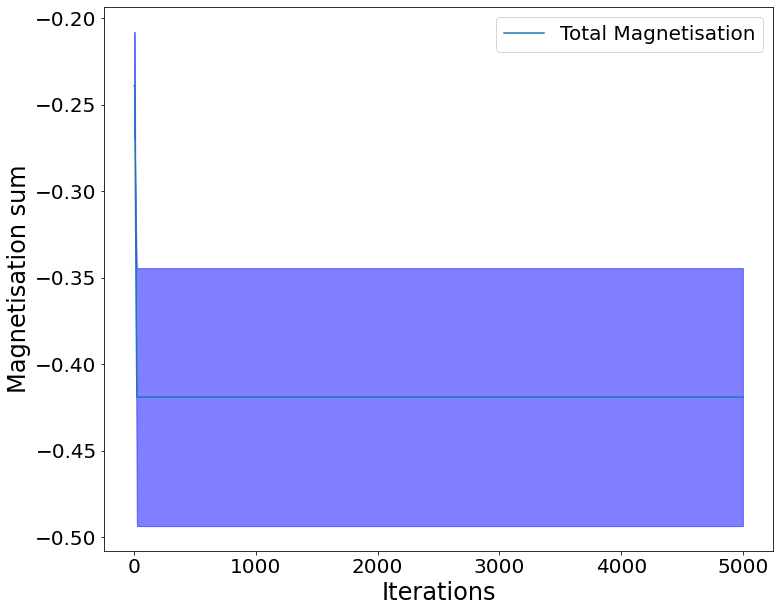

In [27]:
import matplotlib
matplotlib.rcParams.update({'font.size': 20,'figure.figsize':(12,10),'axes.labelsize': 'large',
                           'axes.titlesize':18})


fig,ax=plt.subplots()

xarray=np.arange(0,len(x),1)
ax.plot(x,label='Total Magnetisation')
ax.fill_between(xarray,x+y,x-y,**{'color':'blue','alpha':0.5})


ax.legend()

        
pos_string = '$Budget_{pos}$'
neg_string = '$Budget_{neg}$'
#ax.set_title(r'Overall nodes magnetisation'+'\n' +'for {}={} {}={}'.format(pos_string,budget_pos,neg_string,budget_neg),fontsize=22)
ax.set_xlabel('Iterations')
ax.set_ylabel('Magnetisation sum')

In [ ]:
a=controlArr.copy()
s=min([v.shape[0] for v in a])
x=np.array([v[:s] for v in a])

X = np.zeros((len(a),s,2))

for idx in range(x.shape[0]):
    for jx in range(x.shape[1]):
        X[idx,jx,0]=sum(x>0 for x in x[idx,jx])/len(x[idx,jx])
        X[idx,jx,1]=sum(x<0 for x in x[idx,jx])/len(x[idx,jx])

        
        
mean = np.mean(X,axis=0)
std=np.std(X,axis=0)

In [ ]:
import matplotlib

    
matplotlib.rcParams.update({'font.size': 20,'figure.figsize':(25,5),'axes.labelsize': 'large',
                           'axes.titlesize':18})




fig,ax = plt.subplots(ncols=system.graph_size)
gradients = np.empty((np.array(system.control_field_history_pos).shape))

for i in range(np.array(system.control_field_history_pos).shape[1]):
    
    gradients[:,i] =np.gradient(system.control_field_history_pos[:,i])
    ax[i].plot(gradients[:,i])


fig.suptitle('Positive Agent')
plt.tight_layout()
plt.show()



fig,ax = plt.subplots(ncols=5)
gradients_negative = np.empty((np.array(system.control_field_history_pos).shape))

for i in range(np.array(system.control_field_history_pos).shape[1]):
    
    gradients_negative[:,i] =np.gradient(system.control_field_history_neg[:,i])
    ax[i].plot(gradients_negative[:,i])


fig.suptitle('Negative Agent')
plt.tight_layout()
plt.show()

In [ ]:
exp_beta_list = np.logspace(-0.7, 0.5, endpoint=True,num=10)
budget_pos=1.0
budget_neg=1.0
y = np.zeros(len(exp_beta_list))
control_history_pos=[]
control_history_neg=[]
mag_history=[]

system = mf_ising_system(G,h,lr_1,lr_2,iim_iter=10000,fixed_point_iter=int(5*1e5),fp_tol_fac=10-5,iim_tol_fac=1e-3,
                         momentum=1.1,optimiser_type='sgd')
for i,beta in enumerate(exp_beta_list):
    control_pos,control_neg,mag=system.MF_IIM(budget_pos,budget_neg,beta)
    control_history_pos.append(control_pos)
    control_history_neg.append(control_neg)
    mag_history.append(mag)
    if i%10==0:
        print(i,beta)

print('FINISHED')    

In [ ]:
import matplotlib

beta_crit=0.5
    
matplotlib.rcParams.update({'font.size': 14,'figure.figsize':(10,5),'axes.labelsize': 'large',
                           'axes.titlesize':18})

def average_degree(control,budget):
    return np.sum([G.degree[i]*con for i,con in enumerate(control)])/budget





avs_deg_pos=np.zeros(len(control_history_pos))
avs_deg_neg=np.zeros(len(control_history_pos))


for it,control in enumerate(control_history_pos):
    average_degree_pos = average_degree(control,budget_pos)
    avs_deg_pos[it]=average_degree_pos
    
for it,control in enumerate(control_history_neg):

    average_degree_neg = -average_degree(control,budget_neg)
    avs_deg_neg[it]=average_degree_neg

fig,ax = plt.subplots(figsize=(9,5))



ax.scatter(exp_beta_list,avs_deg_pos,linewidth=3,label='Positive Agent, budget={}'.format(budget_pos))
ax.scatter(exp_beta_list,avs_deg_neg,linewidth=3,label='Negative Agent, budget={}'.format(budget_neg))

ax.set_xscale(value='log')

ax.vlines(beta_crit,ymin=min([min(avs_deg_pos),min(avs_deg_neg)]),ymax=max([max(avs_deg_pos),max(avs_deg_neg)])
          ,linestyles='dashed',color='black',label=r'$\beta_{crit}$')



ax.set_xticks([0.2,0.3,0.5,1.0,2.0, 3.0])
ax.get_xaxis().set_major_formatter(matplotlib.ticker.ScalarFormatter())
ax.set_ylabel('Average degree')
ax.set_xlabel(r'Interaction Strenght ($\beta$)')
ax.legend()
plt.show()
